# Audio Data Processing


In this quick data analysis and visualisation project, I read in an audio dataset and look at various aspects of an example file, transforming an example file into plots that can be used for a ML model

RAVDESS Emotional speech audio dataset:
https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio?resource=download

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
from glob import glob

In [53]:
#pip install librosa

In [6]:
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()['color']
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()['color'])

## Reading in audio files

In [9]:
audio_files = glob("/Users/davidrichardson/Downloads/ravdess_emotional_speech_audio/audio_speech_actors_01-24/*/*.wav")

In [11]:
# Play audio file
ipd.Audio(audio_files[100])

In [16]:
# Quick look at some details of the first audio file
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:15]}') # raw audio data
print(f'shape y: {y.shape}')
print(f'sr: {sr}') # sample rate

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (86081,)
sr: 22050


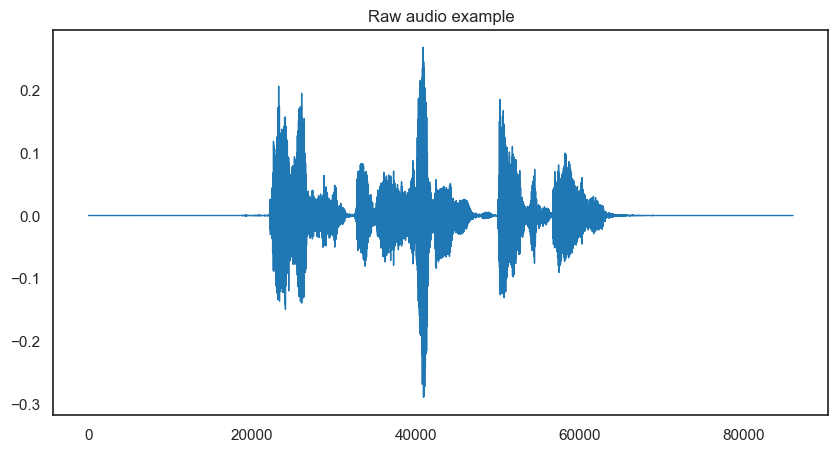

In [20]:
# A Numpy array is easier to plot if we convert it into a Pandas series

pd.Series(y).plot(figsize=(10, 5), lw=1, 
                  title='Raw audio example', 
                  color=color_pal[0])
plt.show()

We see there is a lot of silence before and after the interesting part of the audio file - so we can trim it and focus on the important part

In [22]:
y_trimmed, _ = librosa.effects.trim(y)

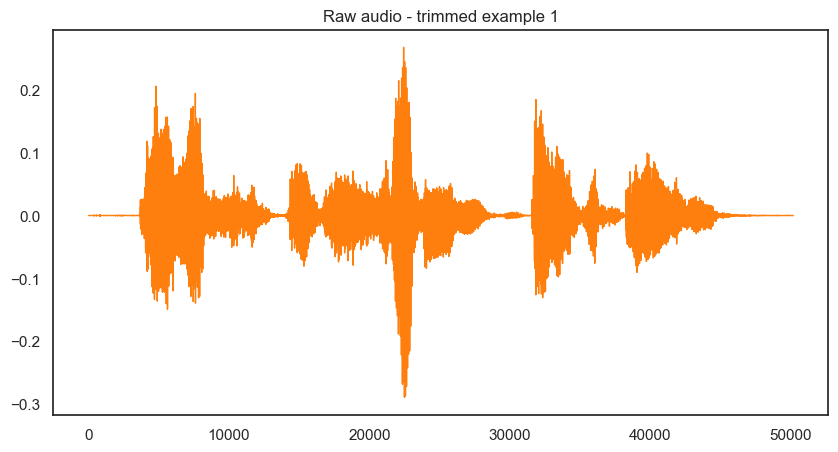

In [26]:
pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, 
                  title='Raw audio - trimmed example 1', 
                  color=color_pal[1])
plt.show()

There is still some silence before and after, we can try and trim it a bit more...

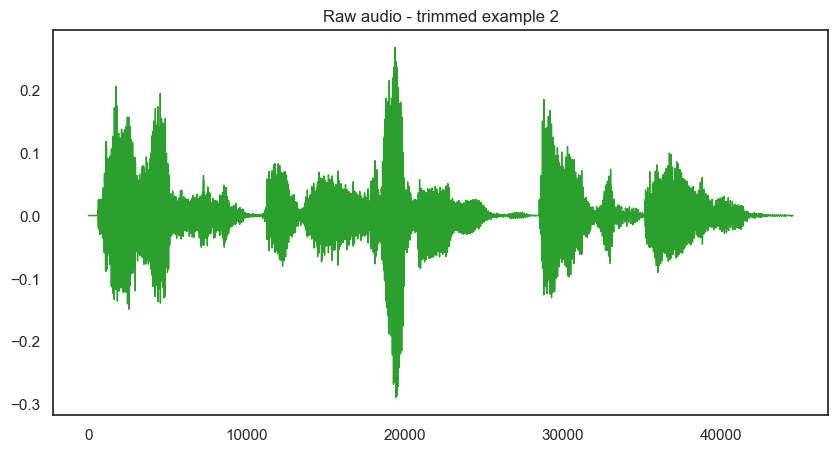

In [28]:
y_trimmed2, _ = librosa.effects.trim(y, top_db=45)
pd.Series(y_trimmed2).plot(figsize=(10, 5), lw=1, 
                  title='Raw audio - trimmed example 2', 
                  color=color_pal[2])
plt.show()

This looks good !

### Zooming in

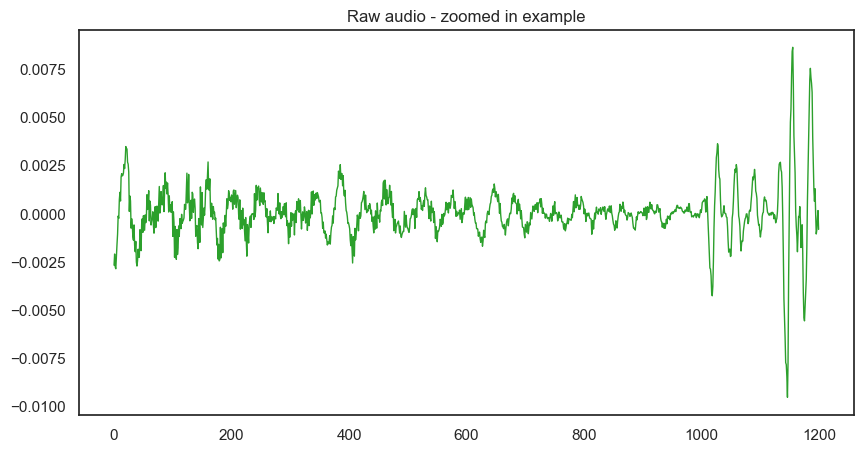

In [32]:
pd.Series(y_trimmed2[10000:11200]).plot(figsize=(10, 5), lw=1, 
                  title='Raw audio - zoomed in example', 
                  color=color_pal[2])
plt.show()

### Spectrogram

Fourier transform - extracting the frequencies at different parts of the file

In [33]:
D = librosa.stft(y)
S_dB = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_dB.shape

(1025, 169)

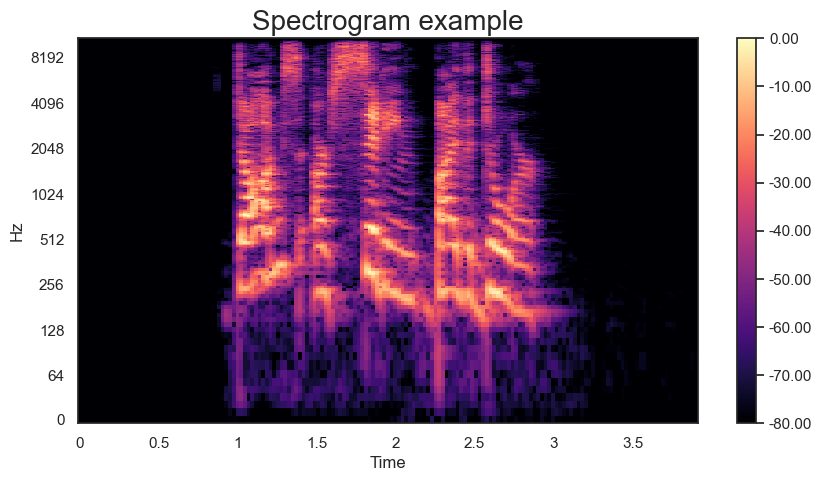

In [44]:
# Plot the transformed audio data (this is what you can feed into a ML model)

fix, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_dB,
                               x_axis="time",
                               y_axis="log",
                               ax=ax)
ax.set_title('Spectrogram example', fontsize=20)
plt.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()


### Mel Spectrogram

Melodic spectrogram

In [51]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128 * 2)
S_dB_mel = librosa.amplitude_to_db(S, ref=np.max)

/var/folders/d7/q_fznsr95_97r6lp_mx_vp640000gn/T/ipykernel_25097/3893191850.py:1: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.9449492e-05
 -3.7519443e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128 * 2)


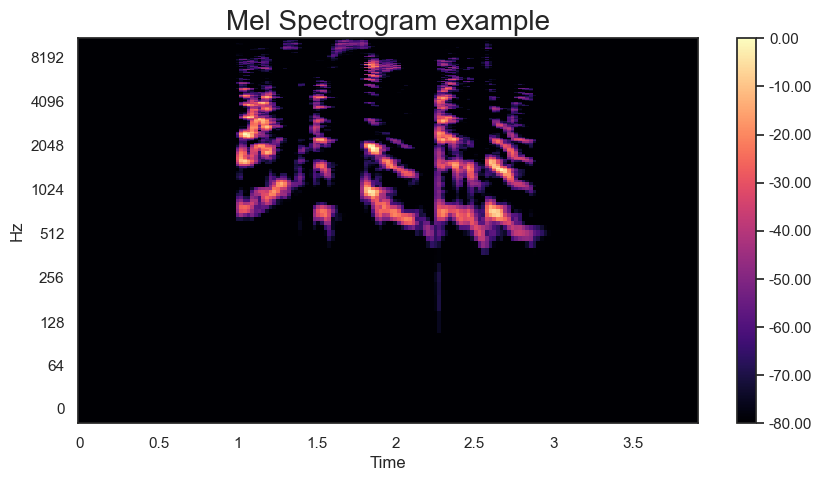

In [52]:
# Plot the mel spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_dB_mel,
                               x_axis="time",
                               y_axis="log",
                               ax=ax)
ax.set_title('Mel Spectrogram example', fontsize=20)
plt.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Next steps

Do this for the entire dataset. This can be fed into an ML model